In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Create simulated dataset
data = {
    "Tournament": [
        "World Jr Hockey Champ 2024",
        "Ontario Regional Cup",
        "Quebec Senior Cup",
        "Canada East Novice Tourney",
        "National Peewee Finals"
    ],
    "Location": ["Winnipeg", "Toronto", "Montreal", "Dawson Creek", "Halifax"],
    "Attendance": [750000, 48000, 56000, 12000, 34000],  # people
    "Ticket_Sales_CAD": [15_000_000, 1_200_000, 1_500_000, 350_000, 950_000], 
    "Merch_Sales_CAD": [3_500_000, 300_000, 420_000, 85_000, 200_000],
    "Expense_CAD": [12_000_000, 900_000, 1_100_000, 300_000, 700_000],
    # Example demographics (% of attendees)
    "Pct_Under18": [20, 35, 30, 45, 33],
    "Pct_Adult_18_35": [40, 40, 38, 35, 42],
    "Pct_Adult_35plus": [40, 25, 32, 20, 25]
}

df = pd.DataFrame(data)
df["Profit_CAD"] = df["Ticket_Sales_CAD"] + df["Merch_Sales_CAD"] - df["Expense_CAD"]
df["Profit_Margin"] = df["Profit_CAD"] / (df["Ticket_Sales_CAD"] + df["Merch_Sales_CAD"])

df.head()

,Tournament,Location,Attendance,Ticket_Sales_CAD,Merch_Sales_CAD,Expense_CAD,Pct_Under18,Pct_Adult_18_35,Pct_Adult_35plus,Profit_CAD,Profit_Margin
0,World Jr Hockey Champ 2024,Winnipeg,750000,15000000,3500000,12000000,20,40,40,6500000,0.351351
1,Ontario Regional Cup,Toronto,48000,1200000,300000,900000,35,40,25,600000,0.400000
2,Quebec Senior Cup,Montreal,56000,1500000,420000,1100000,30,38,32,820000,0.427083
3,Canada East Novice Tourney,Dawson Creek,12000,350000,85000,300000,45,35,20,135000,0.310345
4,National Peewee Finals,Halifax,34000,950000,200000,700000,33,42,25,450000,0.391304


In [3]:
# Display summary statistics
df.describe()

,Attendance,Ticket_Sales_CAD,Merch_Sales_CAD,Expense_CAD,Pct_Under18,Pct_Adult_18_35,Pct_Adult_35plus,Profit_CAD,Profit_Margin
count,5.000000,5.000000e+00,5.000000e+00,5.000000e+00,5.000000,5.000000,5.000000,5.000000e+00,5.000000
mean,180000.000000,3.800000e+06,9.010000e+05,3.000000e+06,32.600000,39.000000,28.400000,1.701000e+06,0.376017
std,319076.793265,6.275249e+06,1.458134e+06,5.039841e+06,9.016651,2.645751,7.765307,2.694259e+06,0.045656
min,12000.000000,3.500000e+05,8.500000e+04,3.000000e+05,20.000000,35.000000,20.000000,1.350000e+05,0.310345
25%,34000.000000,9.500000e+05,2.000000e+05,7.000000e+05,30.000000,38.000000,25.000000,4.500000e+05,0.351351
50%,48000.000000,1.200000e+06,3.000000e+05,9.000000e+05,33.000000,40.000000,25.000000,6.000000e+05,0.391304
75%,56000.000000,1.500000e+06,4.200000e+05,1.100000e+06,35.000000,40.000000,32.000000,8.200000e+05,0.400000
max,750000.000000,1.500000e+07,3.500000e+06,1.200000e+07,45.000000,42.000000,40.000000,6.500000e+06,0.427083


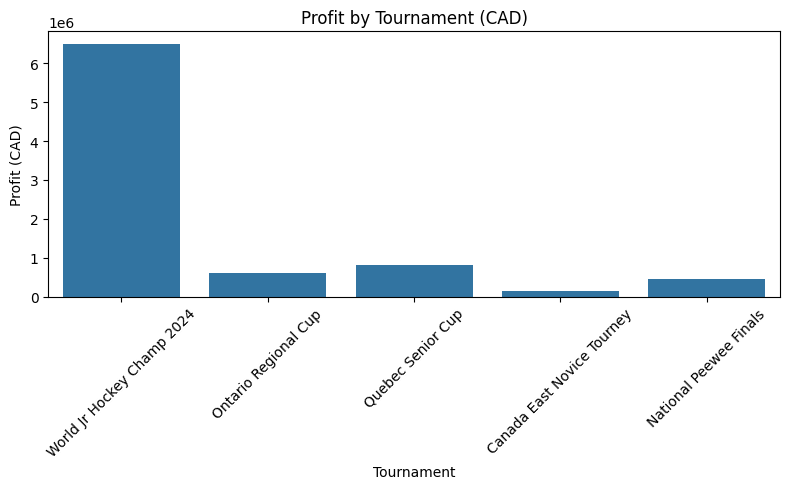

In [4]:
plt.figure(figsize=(8,5))
sns.barplot(x="Tournament", y="Profit_CAD", data=df)
plt.xticks(rotation=45)
plt.title("Profit by Tournament (CAD)")
plt.ylabel("Profit (CAD)")
plt.tight_layout()

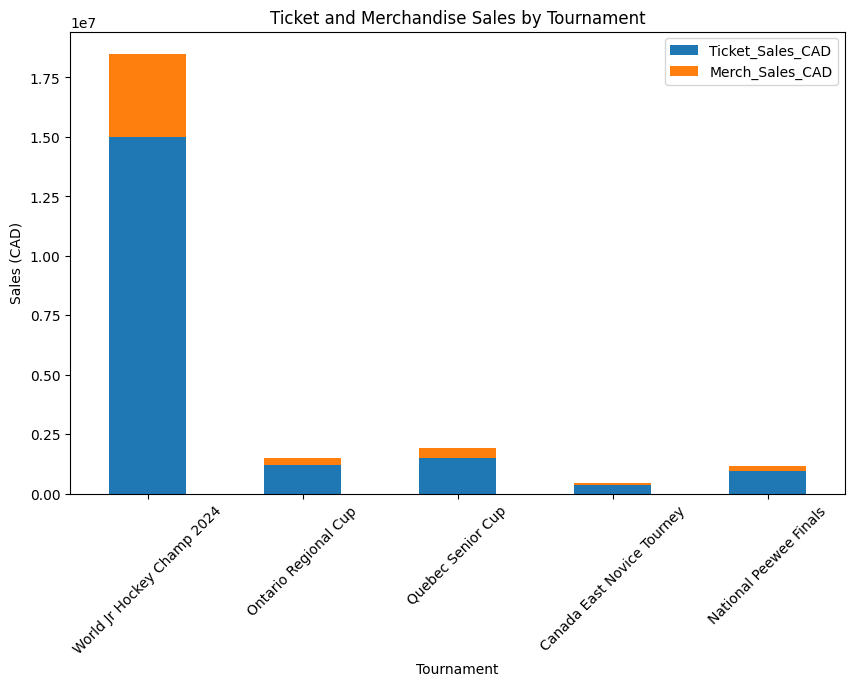

In [5]:
df[["Tournament", "Ticket_Sales_CAD", "Merch_Sales_CAD"]].set_index("Tournament").plot(
    kind="bar", stacked=True, figsize=(10,6)
)
plt.title("Ticket and Merchandise Sales by Tournament")
plt.ylabel("Sales (CAD)")
plt.xticks(rotation=45)
plt.show()

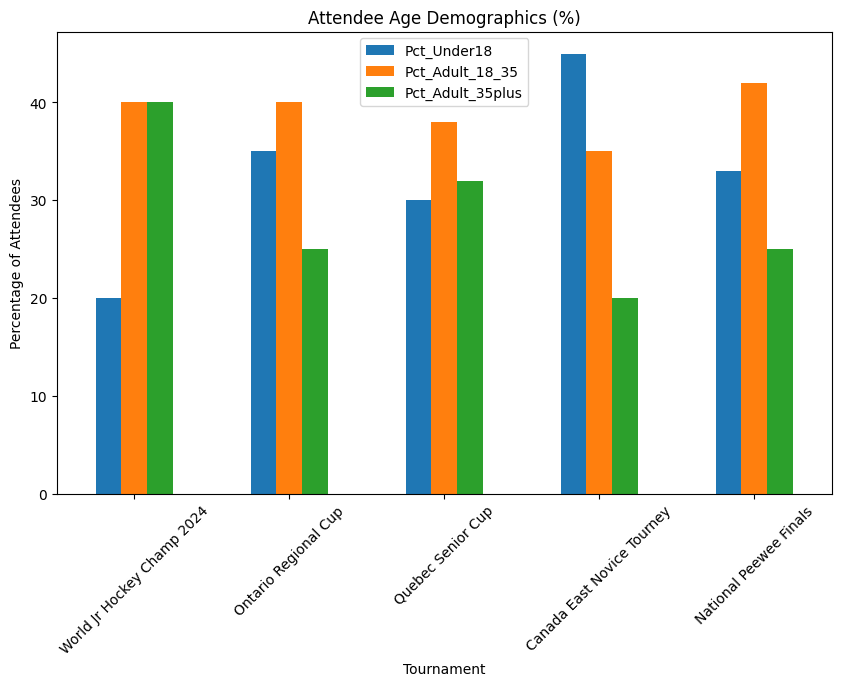

In [6]:
demog_pct = df[["Pct_Under18","Pct_Adult_18_35","Pct_Adult_35plus"]]
demog_pct.index = df["Tournament"]

demog_pct.plot(kind="bar", figsize=(10,6))
plt.title("Attendee Age Demographics (%)")
plt.ylabel("Percentage of Attendees")
plt.xticks(rotation=45)
plt.show()

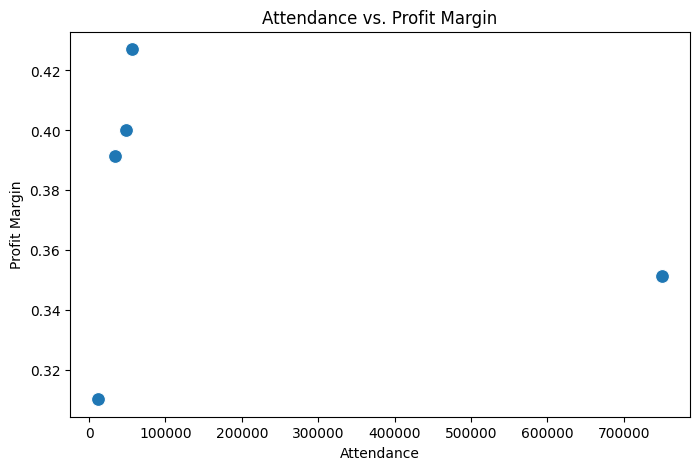

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Attendance", y="Profit_Margin", data=df, s=100)
plt.title("Attendance vs. Profit Margin")
plt.xlabel("Attendance")
plt.ylabel("Profit Margin")
plt.show()